# ScikitLearnの学習 ( クラスタリング )
分類アルゴリズムとは対照的なデータ分析の手法。
アルゴリズムを用いてデータの中にどのようなグループが存在するかを分析する。
クラスタリングに用いるアルゴリズム・機械学習には説明変数に対応する目的変数が存在しないケースなので、
得られたクラスターの正否を判断するのが難しい分析となる。
クラスタリングのアルゴリズムとしてはK近傍法(k-means)、階層的クラスタリングの主に2種が用いられる。

- K近傍法
- 階層的クラスタリング


In [19]:
#K近傍法

K近傍法は予めどれほどのクラスタが存在するか判明している場合に有効。
irisデータの場合はクラス数が3であることが分かっている。

SyntaxError: invalid character '。' (U+3002) (4050779486.py, line 3)

In [4]:
## irisデータのクラスタリング
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

#データを学習用・テスト用に
X,y = iris.data, iris.target

print(X.shape)
print(X[:10])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


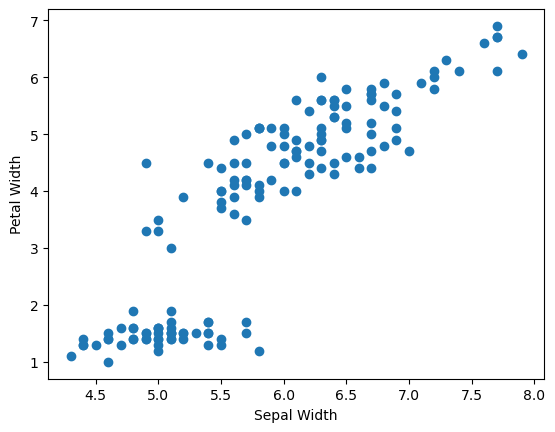

In [7]:
#花びら・がくの長さ（1列目と3列目）を抽出してプロットする
#散布図
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,2])

ax.set_xlabel("Sepal Width")
ax.set_ylabel("Petal Width")
plt.show()

In [18]:
#どのようなクラスタに分類されるかをk-means法で分析する
from sklearn.cluster import KMeans

#k-meansのインスタンス - クラスタ数が3個,
km = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=123)

#KMeansを実行する
y_km =km.fit_predict(X)

print(y_km.shape)
print(y_km[:10])

C:\Users\guest017\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(150,)
[1 1 1 1 1 1 1 1 1 1]


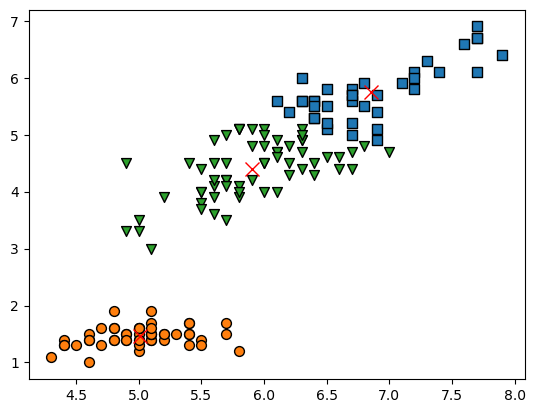

In [17]:
#分類後のクラスタ・クラスタの中心点を表示
import numpy as np
fig, ax = plt.subplots()

#散布図(cluster01)
ax.scatter(X[y_km==0, 0], X[y_km==0, 2], s=50, edgecolor="black", marker="s", label="cluster01")
#クラスター中心
ax.plot(np.mean(X[y_km==0, 0]), np.mean(X[y_km==0, 2]), marker="x", markersize=10, color="red")

#散布図(cluster02)
ax.scatter(X[y_km==1, 0], X[y_km==1, 2], s=50, edgecolor="black", marker="o", label="cluster02")
#クラスター中心
ax.plot(np.mean(X[y_km==1, 0]), np.mean(X[y_km==1, 2]), marker="x", markersize=10, color="red")

#散布図(cluster03)
ax.scatter(X[y_km==2, 0], X[y_km==2, 2], s=50, edgecolor="black", marker="v", label="cluster03")
#クラスター中心
ax.plot(np.mean(X[y_km==2, 0]), np.mean(X[y_km==2, 2]), marker="x", markersize=10, color="red")

ax.legend

In [ ]:
# 階層型クラスタリング
- 凝集型-似ている小さなデータをクラスターにし、最終的に1つのデータにまとまるまで上位クラスターへの統合を繰り返す
- 分割型-1のクラスタ―をより小さな下位クラスターに分割していく

今回は凝集型・階層型クラスタリングを行う。

In [21]:
## irisデータのクラスタリング
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()

#データを学習用・テスト用に
X,y = iris.data, iris.target

print(X.shape)
print(X[:10])

#階層型クラスタリング - クラスタ数を指定すれば自動で分類される
ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
labels = ac.fit_predict(X)
print(labels)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


C:\Users\guest017\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


ValueError: Dimensions of Z and labels must be consistent.

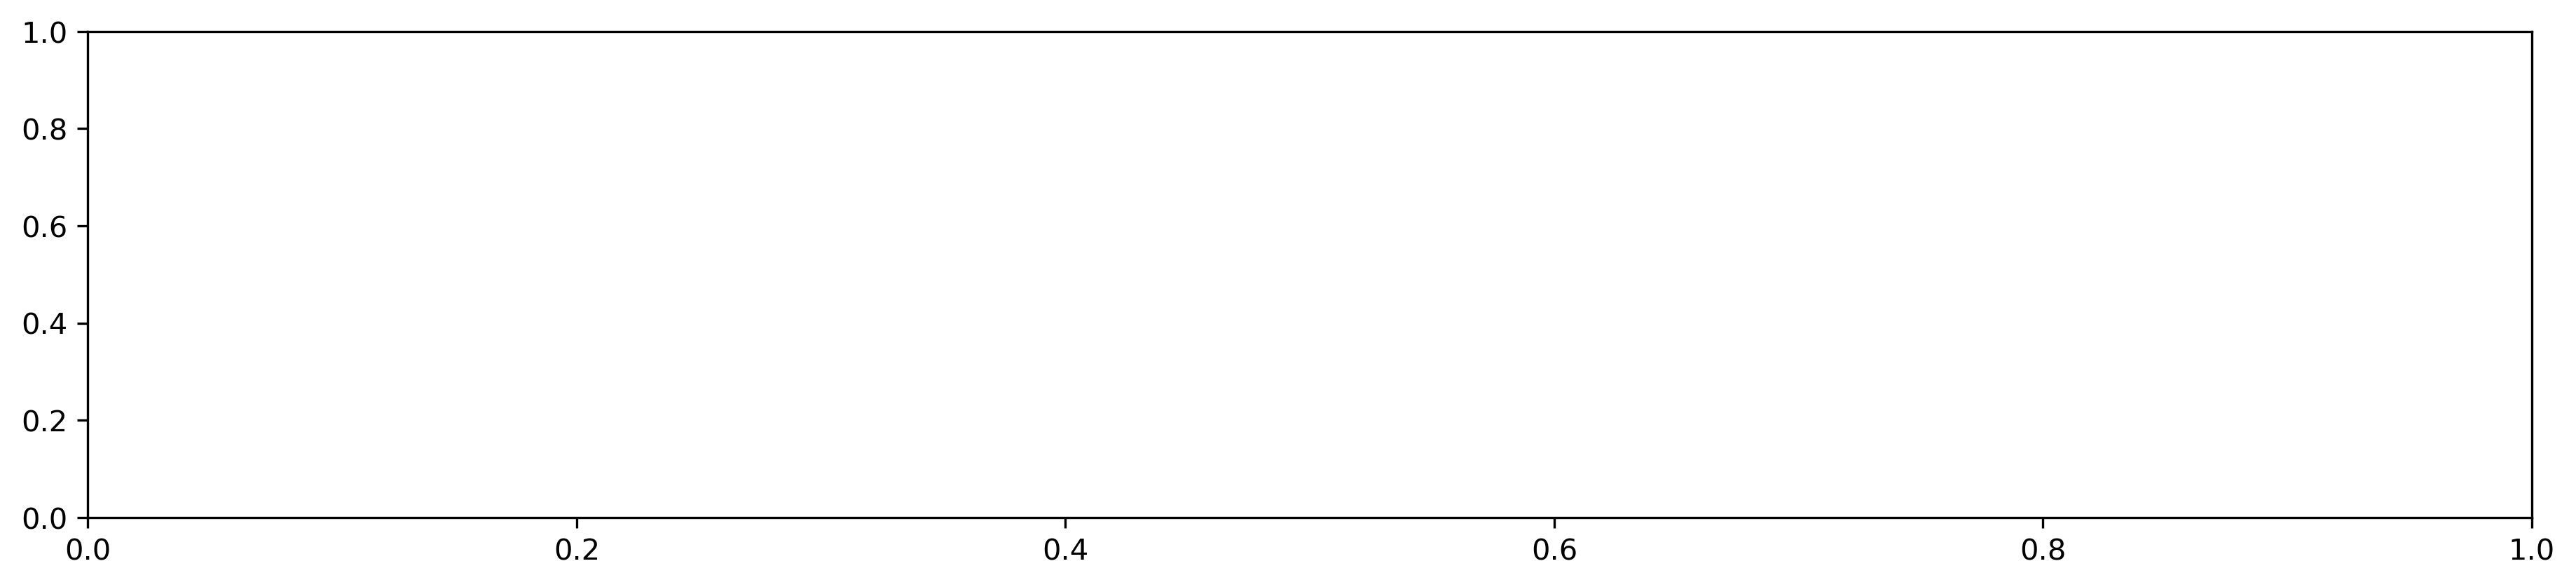

In [25]:
# 分類結果を樹形図に表示する
import numpy as np
from scipy.cluster.hierarchy import dendrogram

#子クラスターの関係・距離を抽出する
children = ac.children_
distance = np.arange(children.shape[0])

#データの観測番号
no_of_observations = np.arange(2, children.shape[0]+2)

#子クラスタ、クラスター間の距離、観測番号を列方向に結合して表現する
linkage_matrix = np.hstack((children, distance.reshape(-1,1), no_of_observations.reshape(-1,1))).astype(float)

#樹形図を描く
fig, ax = plt.subplots(figsize=(15,3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8, color_threshold=np.inf)
plt.show()